In [1]:
import pandas as pd
import yaml
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
from sklearn.inspection import PartialDependenceDisplay

In [3]:
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [4]:
X_test_feat_sel = os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['X_test_file_name'])   
    
y_test_feat_sel = os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['y_test_file_name'])

In [5]:
params_ = {
        'X_test_feat_sel': X_test_feat_sel,
        'y_test_feat_sel': y_test_feat_sel,
        'model': config['model']['path'],    
        }

In [6]:
X_test = pd.read_parquet(params_['X_test_feat_sel'])
y_test = pd.read_parquet(params_['y_test_feat_sel']) 

In [7]:
model_path = os.path.join(
        params_['model'],
        f"model.pkl")
    
with open(model_path, "rb") as file:
        model = pickle.load(file)

<Axes: title={'center': 'Feature Importance'}>

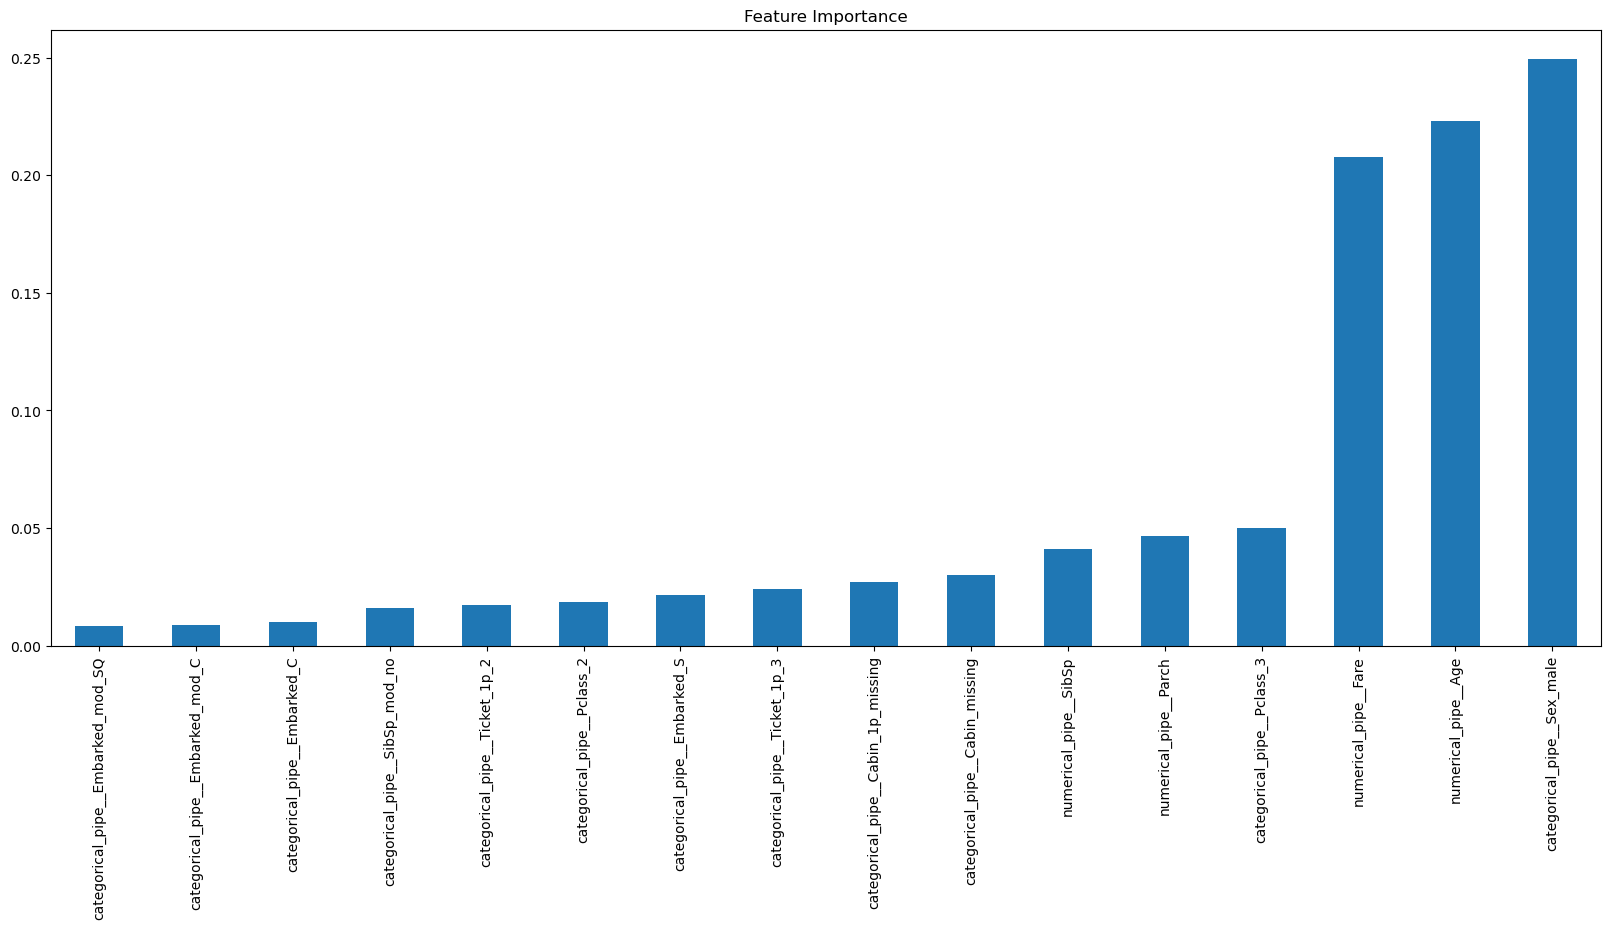

In [8]:
s = pd.Series(
    model.feature_importances_,
    index=model.feature_names_in_
)
s = s.sort_values()
(s
 .plot
 .bar(
     figsize=(20, 8),
     title='Feature Importance'
     )
 )

In [19]:
list_feat = s[-3:].index

In [32]:
feature_names_2_explain = []
feature_names_2_explain_cat = []
for feat in list_feat:
    if feat.find('numerical') == 0:
        feature_names_2_explain.append(feat)
    elif feat.find('categorical') == 0:
        feature_names_2_explain_cat.append(feat)

In [35]:
cols = list(X_test.columns)

In [36]:
idx_num = []
for col in feature_names_2_explain:
    idx_num.append(cols.index(col))

In [37]:
idx_cat = []
for col in feature_names_2_explain_cat:
    idx_cat.append(cols.index(col))

In [38]:
idx = idx_num + idx_cat

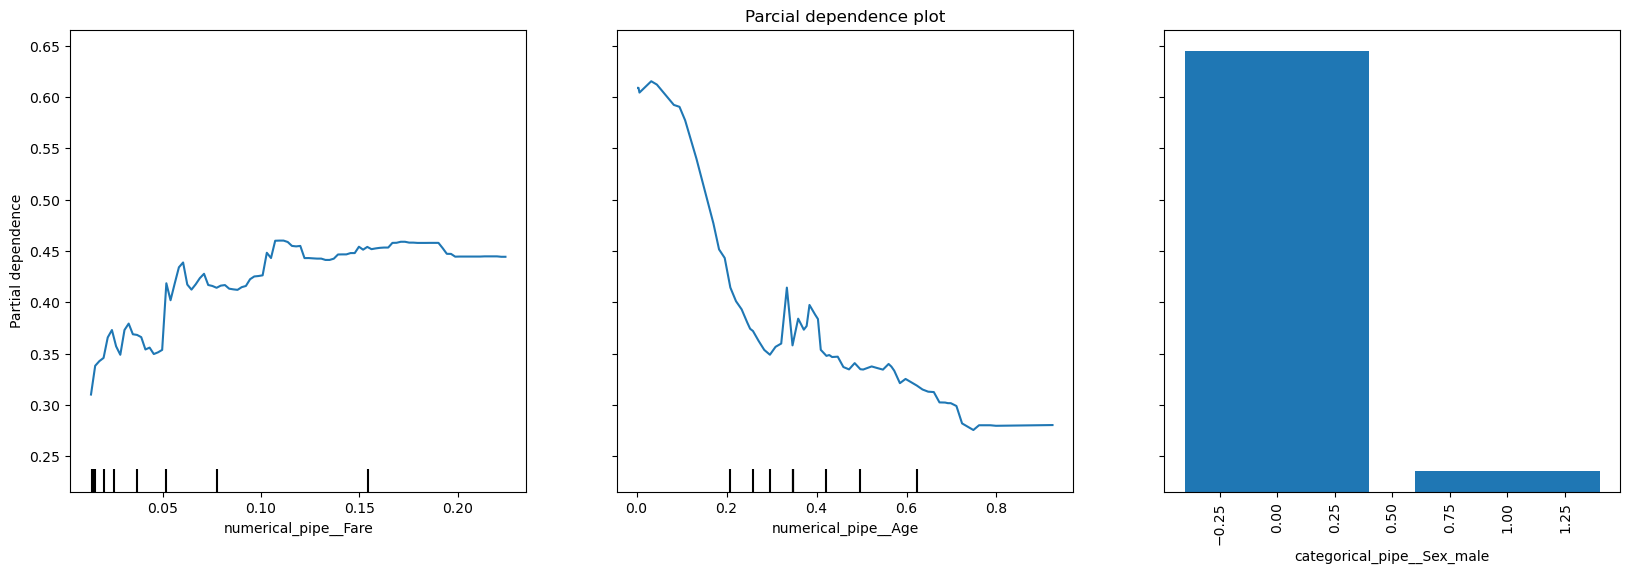

In [39]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title("Parcial dependence plot")

PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    features = idx,
    categorical_features=idx_cat,
    random_state=23,
    ax=ax
)

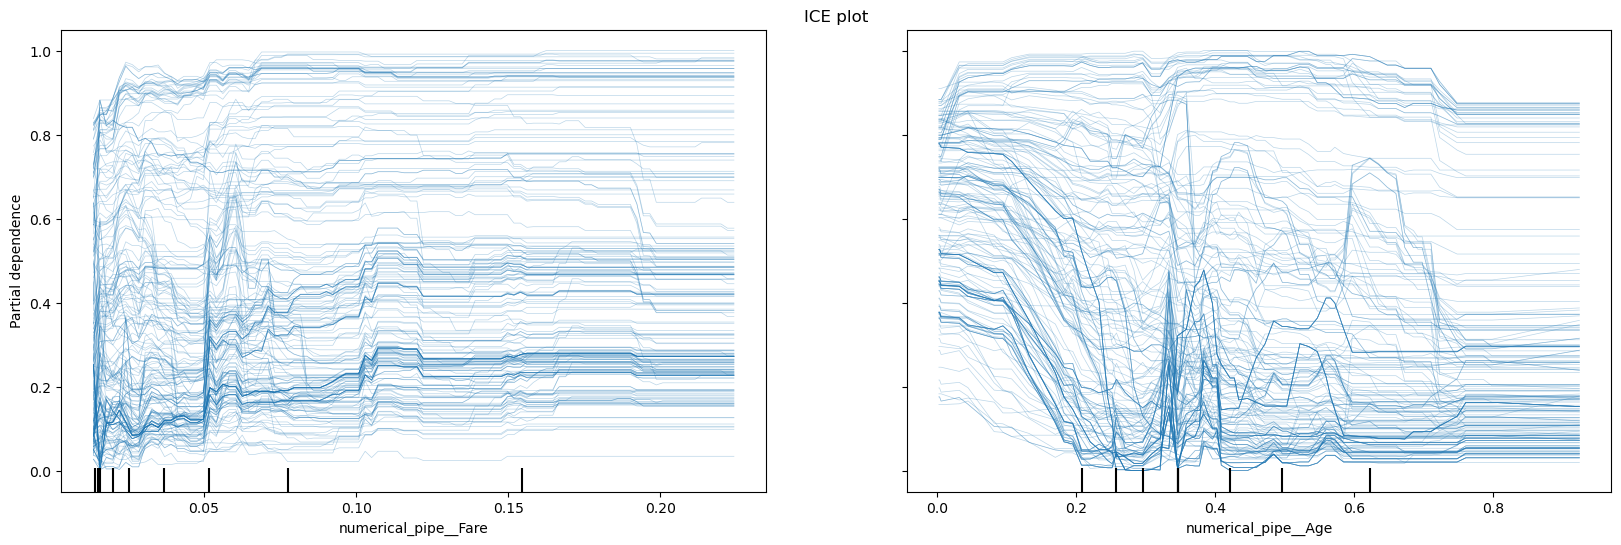

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title("ICE plot")

PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    kind='individual',
    features = idx_num,
    random_state=23,
    ax=ax
);

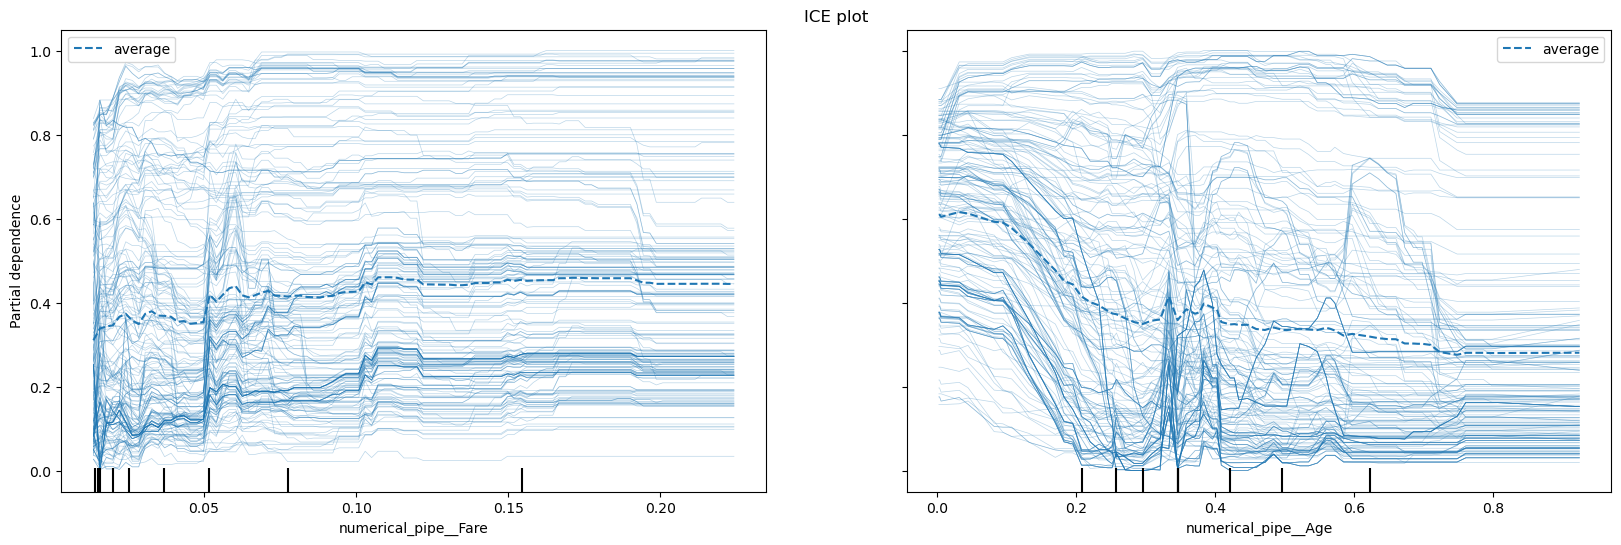

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title("ICE plot")

PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    kind='both',
    features = idx_num,
    random_state=23,
    ax=ax
);

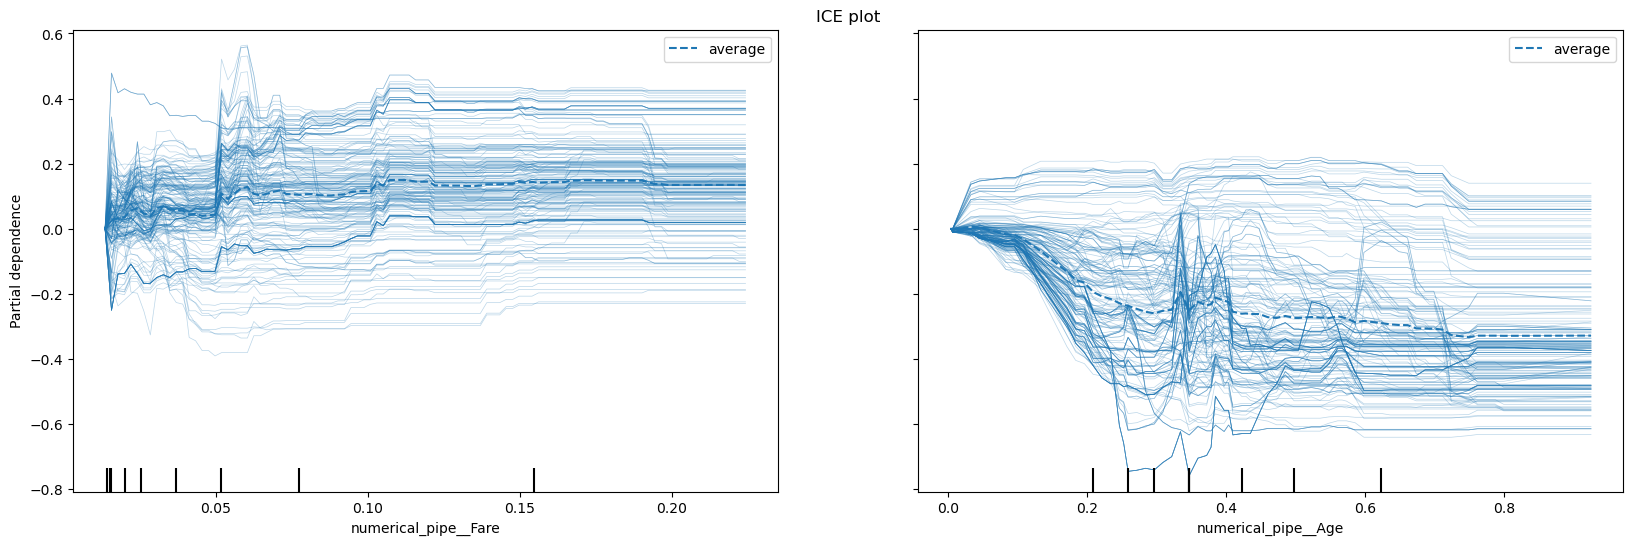

In [18]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title("ICE plot")

PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    kind='both',
    features = idx_num,
    random_state=23,
    centered=True,
    ax=ax
);